In [1]:
# Importing the necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file
data = pd.read_csv('Global+Superstore+Data.csv')

In [3]:
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
data.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [6]:
data.isna().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [7]:
# Creating the new column to create market segments
data['Market Segment'] = data.Market + ' ' + data.Segment

In [8]:
data.head()

,Order Date,Segment,Market,Sales,Profit,Market Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa Consumer


In [9]:
data.nunique()

Order Date         1430
Segment               3
Market                7
Sales             22995
Profit            24575
Market Segment       21
dtype: int64

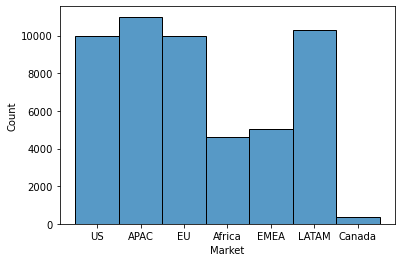

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [10]:
# Plotting graphs to check the count of markets, segments and market segments
sns.histplot(data.Market)
plt.show()
data.Market.value_counts()

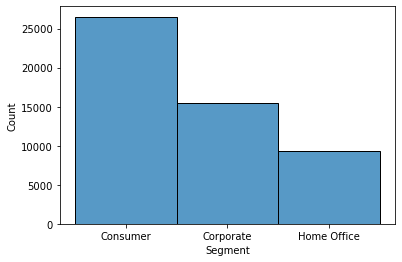

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [11]:
sns.histplot(data.Segment)
plt.show()
data.Segment.value_counts()

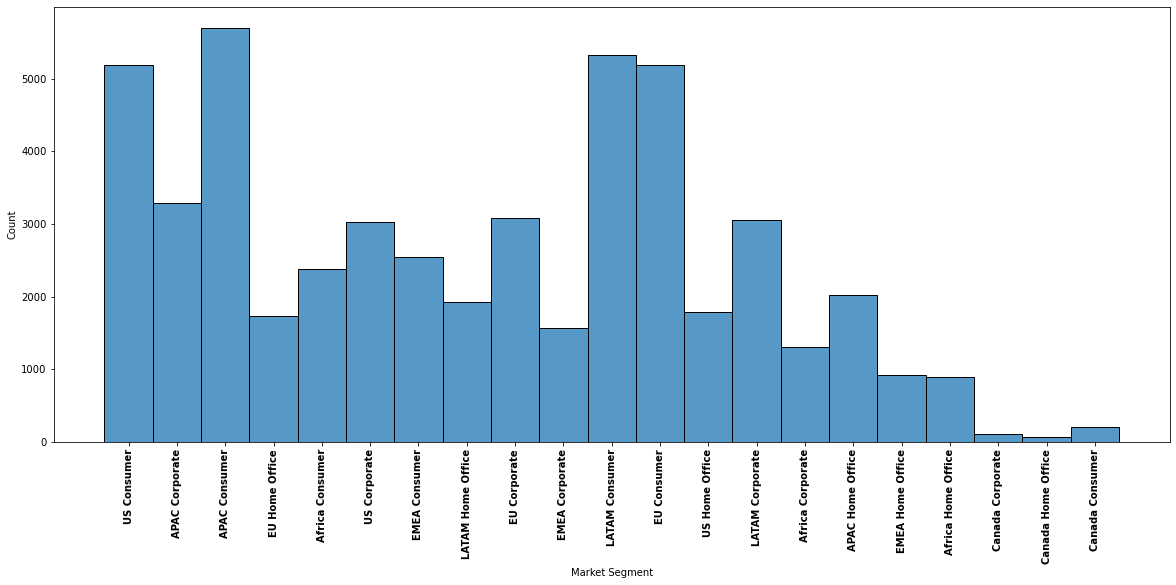

APAC Consumer         5699
LATAM Consumer        5321
US Consumer           5191
EU Consumer           5186
APAC Corporate        3283
EU Corporate          3077
LATAM Corporate       3053
US Corporate          3020
EMEA Consumer         2538
Africa Consumer       2381
APAC Home Office      2020
LATAM Home Office     1920
US Home Office        1783
EU Home Office        1737
EMEA Corporate        1574
Africa Corporate      1312
EMEA Home Office       917
Africa Home Office     894
Canada Consumer        202
Canada Corporate       110
Canada Home Office      72
Name: Market Segment, dtype: int64

In [12]:
plt.figure(figsize= (20,8))
sns.histplot(data['Market Segment'])
plt.xticks(rotation = 90, fontweight = 'bold')
plt.show()
data['Market Segment'].value_counts()

#### As we can see APAC Consumer has the highest count

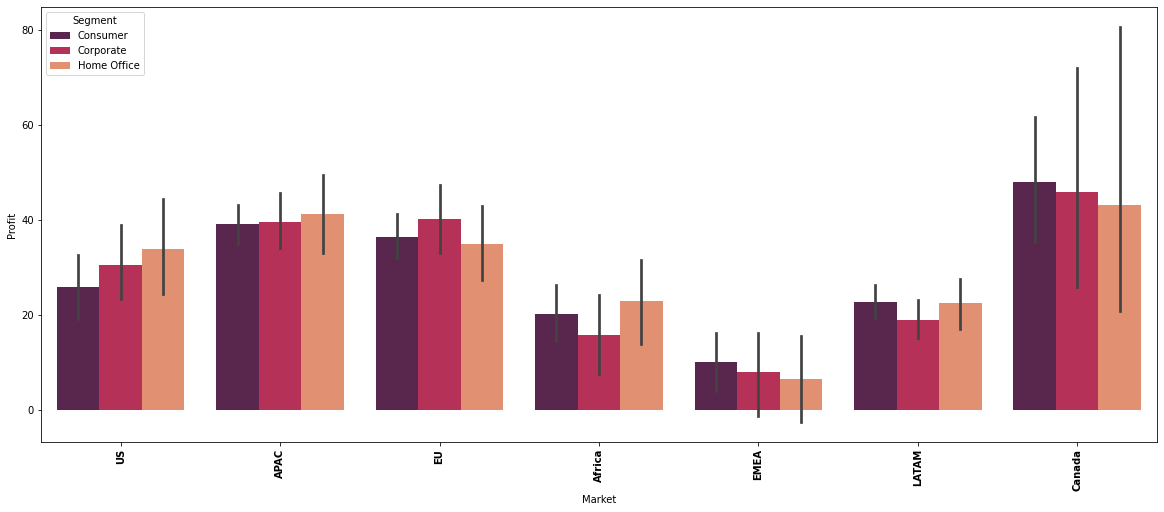

In [13]:
plt.figure(figsize=(20,8))
sns.barplot(x='Market', y= 'Profit', hue='Segment', data=data, palette='rocket')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

#### Canada and APAC have the most profit

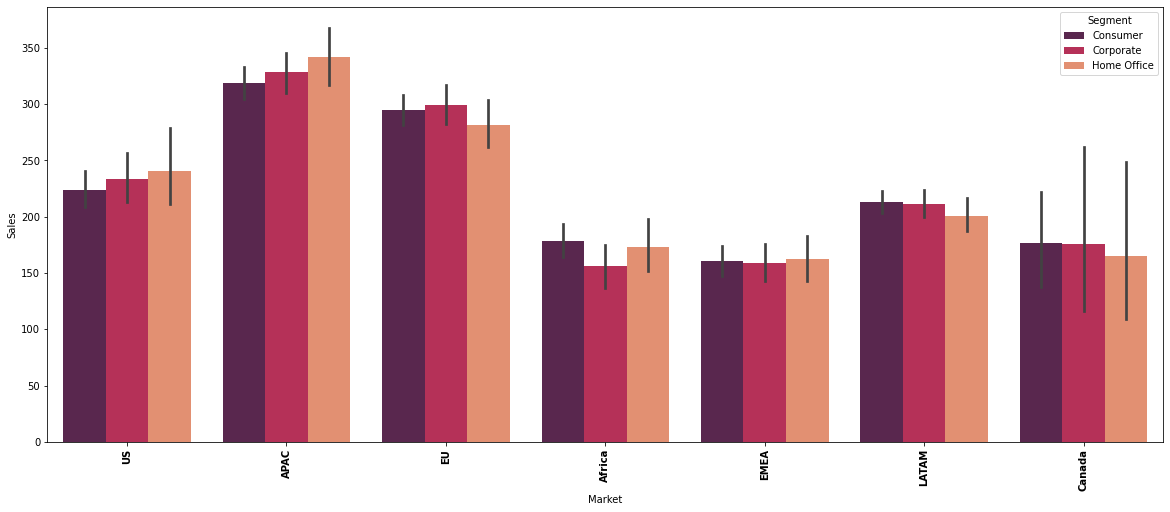

In [14]:
plt.figure(figsize=(20,8))
sns.barplot(x='Market', y= 'Sales', hue='Segment', data=data, palette='rocket' )
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

#### APAC market has the most sales followed by EU

In [15]:
# Converting order date to date time format
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('m')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Order Date      51290 non-null  period[M]
 1   Segment         51290 non-null  object   
 2   Market          51290 non-null  object   
 3   Sales           51290 non-null  float64  
 4   Profit          51290 non-null  float64  
 5   Market Segment  51290 non-null  object   
dtypes: float64(2), object(3), period[M](1)
memory usage: 2.3+ MB


In [17]:
data = data.sort_values(by= ['Order Date'])

In [18]:
data.head()

,Order Date,Segment,Market,Sales,Profit,Market Segment
15262,2011-01,Corporate,EU,139.65,15.30,EU Corporate
26744,2011-01,Consumer,EU,88.44,15.84,EU Consumer
48614,2011-01,Corporate,EU,11.43,4.11,EU Corporate
9417,2011-01,Consumer,LATAM,491.00,122.70,LATAM Consumer
48590,2011-01,Home Office,US,4.71,0.00,US Home Office


In [19]:
# Aggregated by profit month wise
data2 = data.pivot_table( index='Order Date',values='Profit', columns='Market Segment' ,aggfunc='sum')
data2.head()

Market Segment,APAC Consumer,APAC Corporate,APAC Home Office,Africa Consumer,Africa Corporate,Africa Home Office,Canada Consumer,Canada Corporate,Canada Home Office,EMEA Consumer,...,EMEA Home Office,EU Consumer,EU Corporate,EU Home Office,LATAM Consumer,LATAM Corporate,LATAM Home Office,US Consumer,US Corporate,US Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [20]:
data2.shape

(48, 21)

#### Train test Split 

In [21]:
train_len = 42
train_data = data2[0:train_len]
test_data = data2[train_len:]

In [22]:
# Calculating the CoV
cov_data = pd.DataFrame(columns = ['market segment','mean','std', 'cov'])

In [23]:
for i in train_data.columns:
    temp = {"market segment":i, 'mean': np.mean(train_data[i]), 'std':np.std(train_data[i]), 'cov': np.std(train_data[i])/np.mean(train_data[i])}
    cov_data = cov_data.append(temp, ignore_index = True)

In [24]:
cov_data.sort_values(by=['cov'], inplace= True)

In [25]:
cov_data

,market segment,mean,std,cov
0,APAC Consumer,4400.894243,2300.457687,0.522725
1,APAC Corporate,2574.919807,1364.837734,0.530051
12,EU Consumer,3699.977143,2202.282289,0.595215
15,LATAM Consumer,2295.555697,1569.632686,0.683770
13,EU Corporate,2216.299429,1600.336696,0.722076
16,LATAM Corporate,1122.633016,990.360880,0.882177
14,EU Home Office,1224.456536,1148.627937,0.938072
2,APAC Home Office,1511.088314,1523.508658,1.008219
18,US Consumer,2686.740912,2715.031412,1.010530
19,US Corporate,1754.199083,1880.200775,1.071829


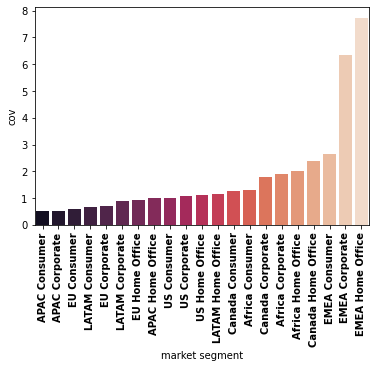

In [26]:
sns.barplot(x='market segment', y= 'cov', data=cov_data, palette='rocket')
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

#### Lowests CoV is of APAC Consumer so it's the most profitable market segment

In [27]:
# chanding order date from datetime to timestamp
data['Order Date'] = data['Order Date'].astype(str)
data['Order Date']=pd.to_datetime(data['Order Date'])

#### Creating a new dataframe only with APAC Consumers 

In [28]:
data3= data[(data['Market Segment']=='APAC Consumer')]
data3.head()

,Order Date,Segment,Market,Sales,Profit,Market Segment
1080,2011-01-01,Consumer,APAC,1429.050,371.490,APAC Consumer
9203,2011-01-01,Consumer,APAC,219.780,59.340,APAC Consumer
19331,2011-01-01,Consumer,APAC,342.510,54.600,APAC Consumer
26270,2011-01-01,Consumer,APAC,102.762,1.842,APAC Consumer
14830,2011-01-01,Consumer,APAC,420.420,147.000,APAC Consumer


In [29]:
data3.shape

(5699, 6)

#### Grouping data based on order date and sales

In [30]:
datasales=pd.DataFrame(data3.groupby("Order Date")['Sales'].sum())
datasales.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [31]:
datasales.shape

(48, 1)

### Time Series Analysis

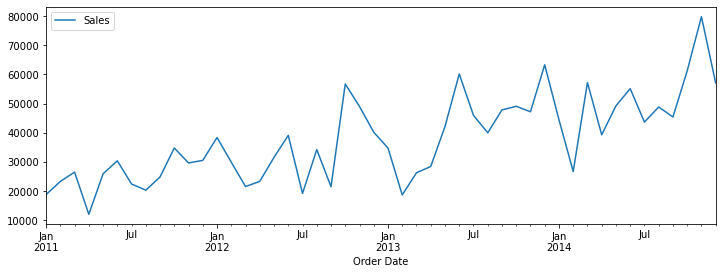

In [32]:
#Ploting a time series data with sales
datasales.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.show(block=False)

In [33]:
# Train test Split
train_len = 42
train = datasales[0:train_len] 
test = datasales[train_len:]

#### Time series decomposition

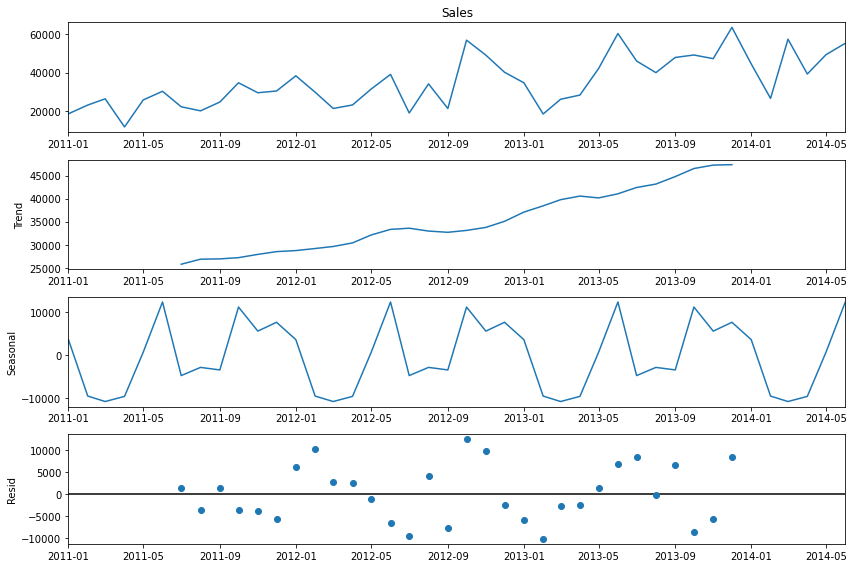

In [34]:
# Additive
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='additive')
fig = decomposition.plot()
plt.show()

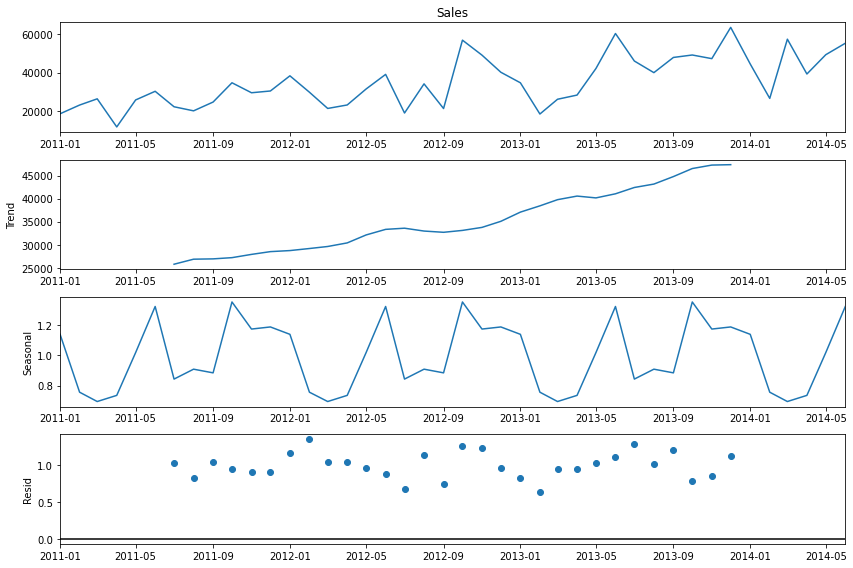

In [35]:
# Multiplicative
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='multiplicative')
fig = decomposition.plot()
plt.show()

### Simple exponential smoothing

In [36]:
train_len = 42
train = datasales[0:train_len] 
test = datasales[train_len:]

In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

C:\Users\sapta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sapta\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


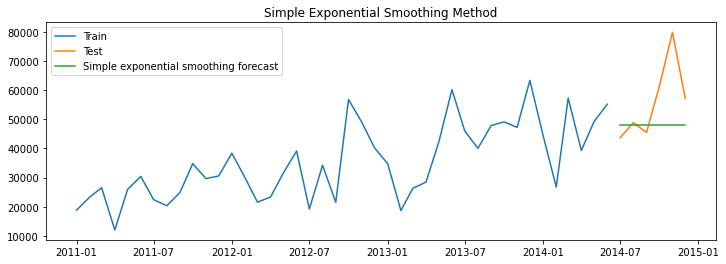

In [38]:
# Plot of train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [39]:
#calculating MAPE and adding it to the table
from sklearn.metrics import mean_squared_error
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'MAPE': [mape]})
Results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'],'MAPE': [mape] })
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.74


###  Holt's Exponential Smoothing

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18821.9898, 'initial_trend': 4491.363300000001, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


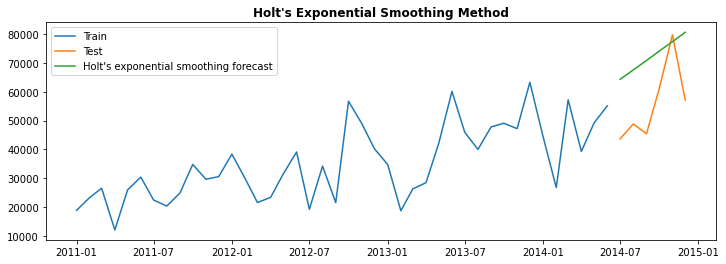

In [41]:
#Ploting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method', fontweight='bold')
plt.show()

In [42]:
#calculating MAPE and adding it to the table
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.74
0,Holt's exponential smoothing method,34.57


### Holt-Winters’ exponential smoothing - Additive

In [43]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.07570161347633023, 'smoothing_trend': 0.010812706193831893, 'smoothing_seasonal': 0.10268263193663257, 'damping_trend': nan, 'initial_level': 34102.52991664042, 'initial_trend': 627.6064930782369, 'initial_seasons': array([-15283.10555194, -10806.90456373,  -7597.30436998, -22062.62358277,
        -8170.13113215,  -3709.08802684, -11681.83409982, -13779.07238533,
        -9254.44803494,    676.72981693,  -4462.59991337,  -3555.18808066]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\sapta\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


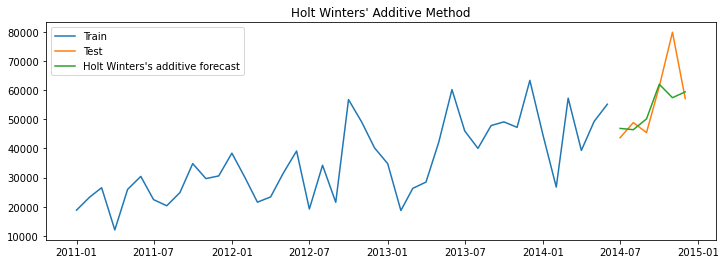

In [44]:
#Ploting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [45]:
#calculating MAPE and adding it to the table
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.74
0,Holt's exponential smoothing method,34.57
0,Holt Winters' additive method,9.33


### Holt-Winters’ exponential smoothing - Multiplicative

In [46]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833334, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\sapta\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


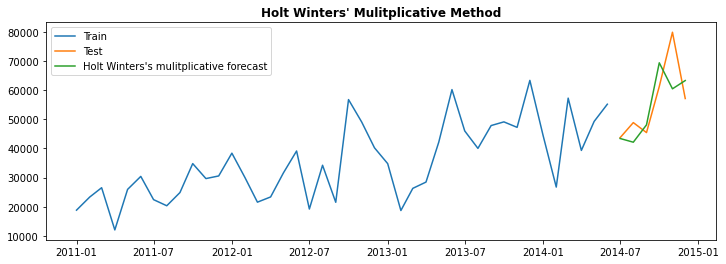

In [47]:
#Ploting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method', fontweight='bold')
plt.show()

In [48]:
#calculating MAPE and adding it to the table
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.74
0,Holt's exponential smoothing method,34.57
0,Holt Winters' additive method,9.33
0,Holt Winters' multiplicative method,11.43


### ARIMA set of techniques

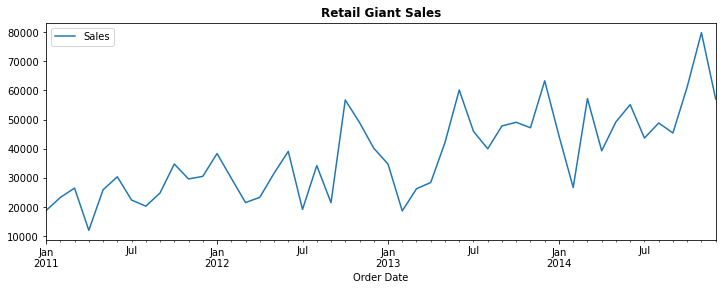

In [49]:
datasales['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales', fontweight='bold')
plt.show(block=False)

In [50]:
#Augmented Dickey Fuller test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(datasales['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


#### p-value is less than 0.05 and is 0.011 so the series is stationary and we rejected the null hypothesis

### Box Cox transformation to make variance constant 

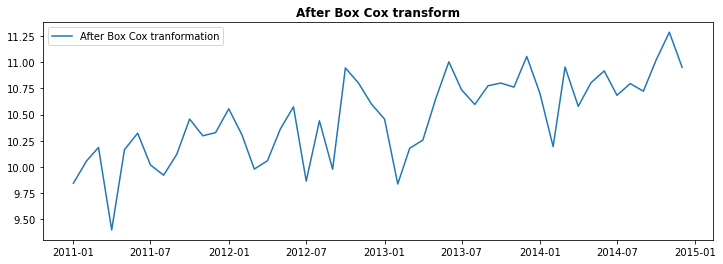

In [51]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(datasales['Sales'], lmbda=0), index = datasales.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform', fontweight= 'bold')
plt.show()

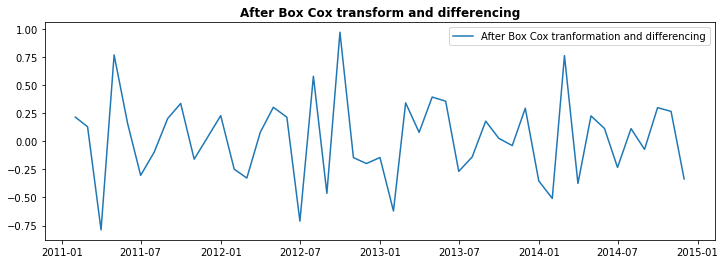

In [52]:
# Differencing to remonve the trend and seasonality
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), datasales.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing', fontweight='bold')
plt.show()

In [53]:
data_boxcox_diff.dropna(inplace=True)

In [54]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


#### We have managed to reduce the p value substantially and the series is constant

### AR Model

In [55]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [56]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


C:\Users\sapta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [57]:
#Recover original time series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

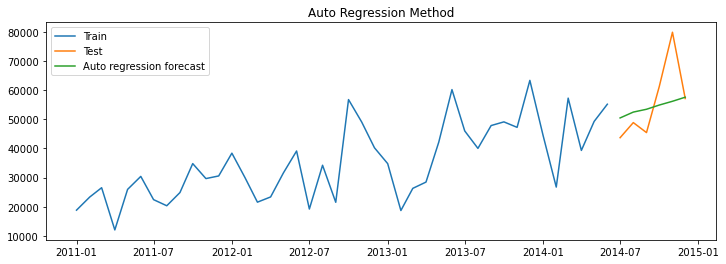

In [58]:
#Ploting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [59]:
#calculating MAPE and adding it to the table
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.74
0,Holt's exponential smoothing method,34.57
0,Holt Winters' additive method,9.33
0,Holt Winters' multiplicative method,11.43
0,Autoregressive (AR) method,13.56


### MA Model 

In [60]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


C:\Users\sapta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [61]:
#Recover original time series
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

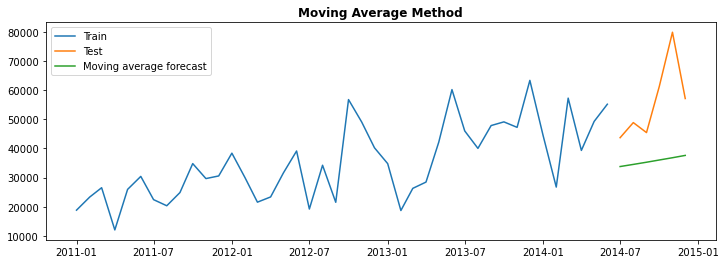

In [62]:
#Ploting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(datasales['Sales'][:train_len], label='Train')
plt.plot(datasales['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method', fontweight='bold')
plt.show()

In [63]:
#calculating MAPE and adding it to the table
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.74
0,Holt's exponential smoothing method,34.57
0,Holt Winters' additive method,9.33
0,Holt Winters' multiplicative method,11.43
0,Autoregressive (AR) method,13.56
0,Moving Average (MA) method,33.93


### ARMA model

In [64]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


C:\Users\sapta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [65]:
#Recover original time series
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

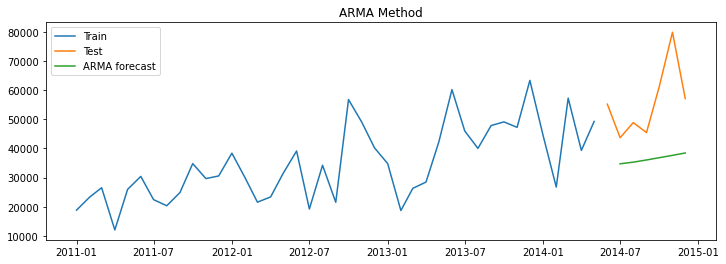

In [66]:
#Ploting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(datasales['Sales'][:train_len-1], label='Train')
plt.plot(datasales['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [67]:
#calculating MAPE and adding it to the table
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.74
0,Holt's exponential smoothing method,34.57
0,Holt Winters' additive method,9.33
0,Holt Winters' multiplicative method,11.43
0,Autoregressive (AR) method,13.56
0,Moving Average (MA) method,33.93
0,Autoregressive moving average (ARMA) method,32.40


### ARIMA model

In [68]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))# p,d,q
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


C:\Users\sapta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sapta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [69]:
#Recover original time series
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

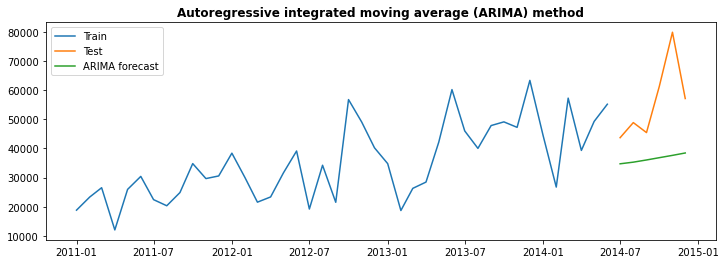

In [70]:
#Ploting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method', fontweight='bold')
plt.show()

In [71]:
#calculating MAPE and adding it to the table
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.74
0,Holt's exponential smoothing method,34.57
0,Holt Winters' additive method,9.33
0,Holt Winters' multiplicative method,11.43
0,Autoregressive (AR) method,13.56
0,Moving Average (MA) method,33.93
0,Autoregressive moving average (ARMA) method,32.40
0,Autoregressive integrated moving average (ARIM...,32.40


### SARIMA model

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.042724
ma.L1      -0.996913
ar.S.L12    0.099765
ma.S.L12   -0.970240
sigma2      0.058347
dtype: float64


C:\Users\sapta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sapta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [73]:
#Recover original time series
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

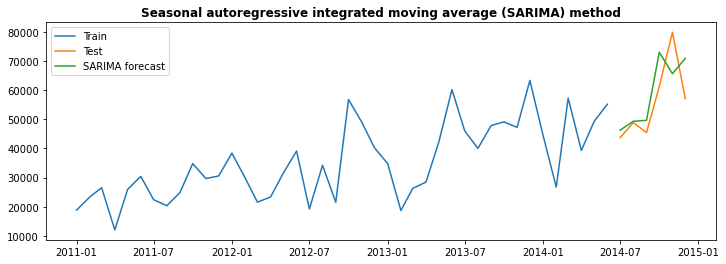

In [74]:
#Ploting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method',fontweight='bold')
plt.show()

In [75]:
#calculating MAPE and adding it to the table
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['(SARIMA) Seasonal autoregressive integrated moving average method'], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing forecast,15.74
0,Holt's exponential smoothing method,34.57
0,Holt Winters' additive method,9.33
0,Holt Winters' multiplicative method,11.43
0,Autoregressive (AR) method,13.56
0,Moving Average (MA) method,33.93
0,Autoregressive moving average (ARMA) method,32.40
0,Autoregressive integrated moving average (ARIM...,32.40
0,(SARIMA) Seasonal autoregressive integrated mo...,12.88


### After doing all the techniques we can see that Holt Winters' additive method is the best forecasting method in the smoothing technique

### Among the ARIMA set of techniques we can see that SARIMA is the best method